<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_3_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv.zip to AB_NYC_2019.csv.zip


In [3]:
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv.zip")
print("Initial Data Shape:", df.shape)
print(df.head())
print(df.info())
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
print("\nMissing Values After Filling:\n", df.isnull().sum())
df = df.drop_duplicates()
print("Shape After Removing Duplicates:", df.shape)
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()
df = df[df['price'] <= 1000]
df = df[df['minimum_nights'] <= 365]
df = df[(df['latitude'] >= 40.4774) & (df['latitude'] <= 40.9176)]
df = df[(df['longitude'] >= -74.2591) & (df['longitude'] <= -73.7004)]
print("\nData Shape After Cleaning:", df.shape)
print("Missing Values After Cleaning:\n", df.isnull().sum())
df.to_csv("AB_NYC_2019_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'AB_NYC_2019_Cleaned.csv'")


Initial Data Shape: (48895, 16)
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149       

Initial Data Shape: (48895, 16)
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149       

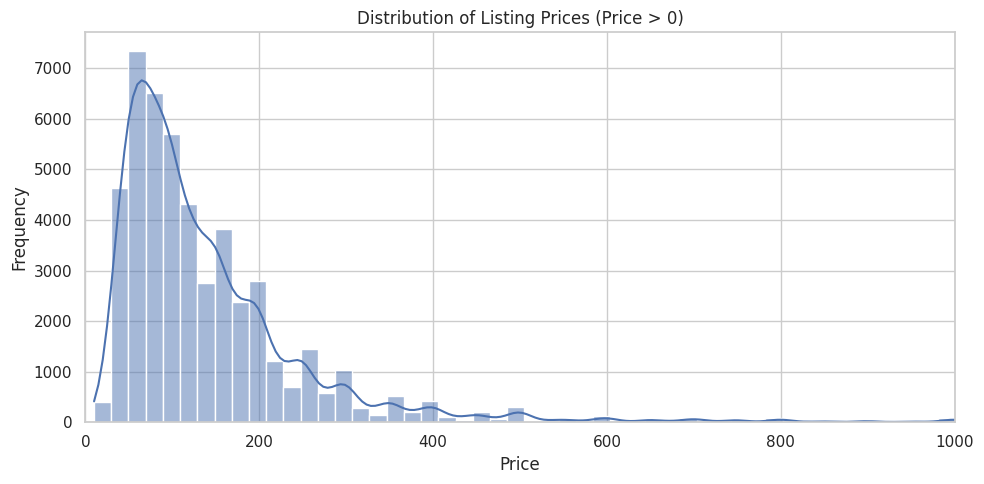

/tmp/ipython-input-723238680.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette="Set2")


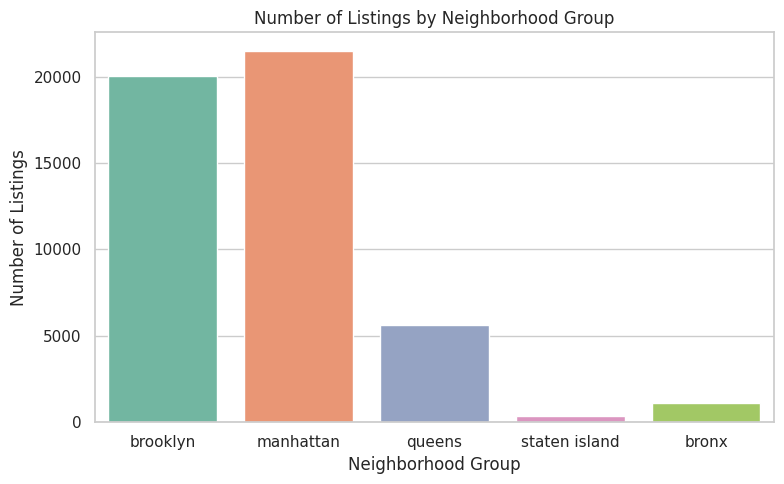

/tmp/ipython-input-723238680.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='room_type', y='price', estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-723238680.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='room_type', y='price', estimator='mean', ci=None, palette='pastel')


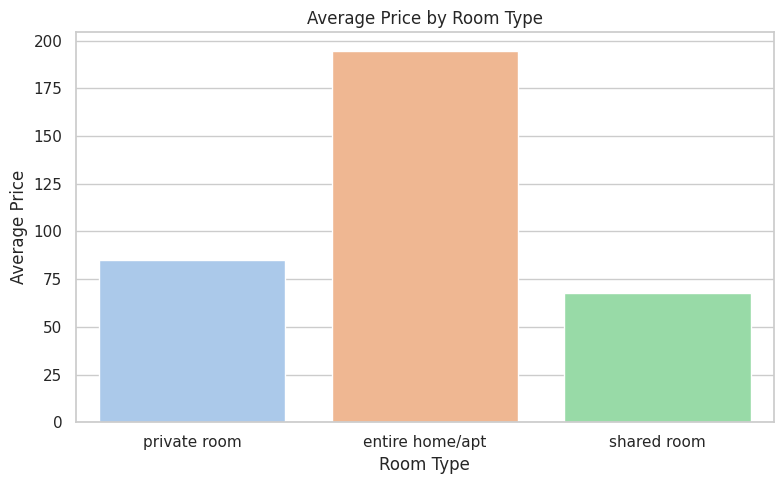

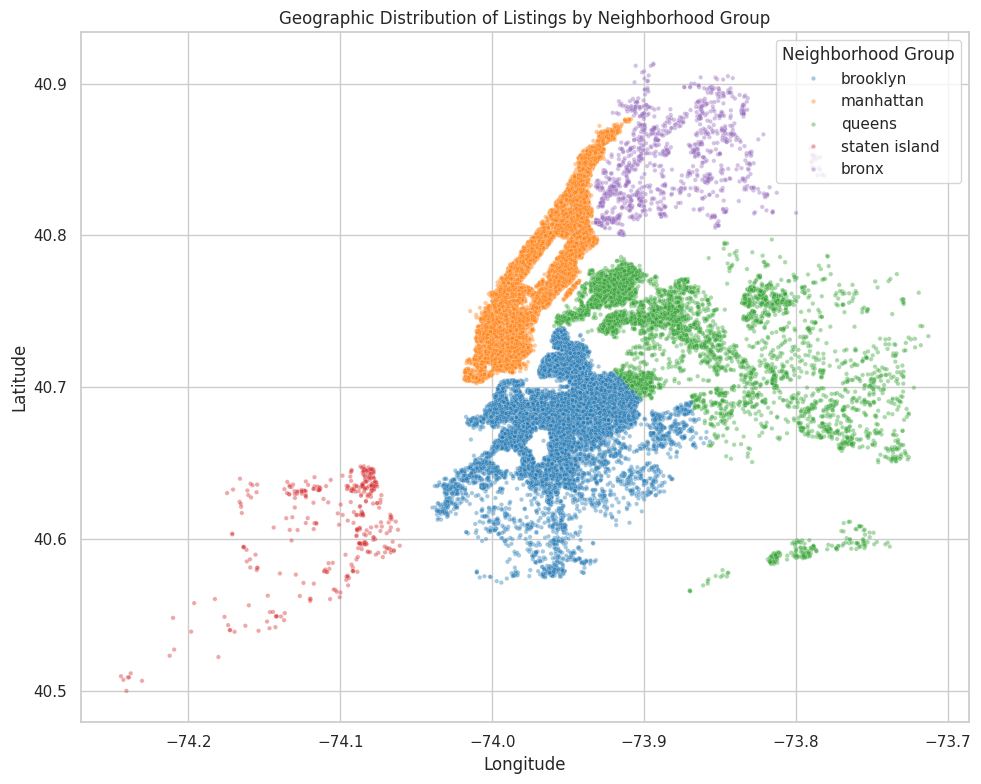

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("AB_NYC_2019.csv.zip")
print("Initial Data Shape:", df.shape)
print(df.head())
print(df.info())
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Filling:\n", df.isnull().sum())
df = df.drop_duplicates()
print("Shape After Removing Duplicates:", df.shape)
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()
df = df[df['price'] <= 1000]
df = df[df['minimum_nights'] <= 365]
df = df[(df['latitude'] >= 40.4774) & (df['latitude'] <= 40.9176)]
df = df[(df['longitude'] >= -74.2591) & (df['longitude'] <= -73.7004)]
print("\nFinal Data Shape:", df.shape)
print("Missing Values After Cleaning:\n", df.isnull().sum())
df.to_csv("AB_NYC_2019_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'AB_NYC_2019_Cleaned.csv'")
plt.figure(figsize=(10, 5))
sns.histplot(df[df['price'] > 0]['price'], bins=50, kde=True)
plt.title("Distribution of Listing Prices (Price > 0)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', palette="Set2")
plt.title("Number of Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='room_type', y='price', estimator='mean', ci=None, palette='pastel')
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette='tab10', alpha=0.4, s=10)
plt.title("Geographic Distribution of Listings by Neighborhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Neighborhood Group', loc='upper right')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv.zip")
print("Missing values before:\n", df.isnull().sum())
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
print("\nMissing values after:\n", df.isnull().sum())


Missing values before:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values after:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type  

In [6]:
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv.zip")
print("Shape before removing duplicates:", df.shape)
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows found: {duplicate_rows.shape[0]}")
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)
df.to_csv("AB_NYC_2019_NoDuplicates.csv", index=False)
print("Dataset without duplicates saved as 'AB_NYC_2019_NoDuplicates.csv'")


Shape before removing duplicates: (48895, 16)
Number of duplicate rows found: 0
Shape after removing duplicates: (48895, 16)
Dataset without duplicates saved as 'AB_NYC_2019_NoDuplicates.csv'


In [7]:
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv.zip")
print("Before standardization:\n", df.head(3))
text_cols = df.select_dtypes(include=['object']).columns
df[text_cols] = df[text_cols].apply(lambda col: col.str.strip().str.lower())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['price'] = df['price'].round(2)
print("\nAfter standardization:\n", df.head(3))
df.to_csv("AB_NYC_2019_Standardized.csv", index=False)
print("\nDataset standardized and saved as 'AB_NYC_2019_Standardized.csv'")


Before standardization:
      id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                         

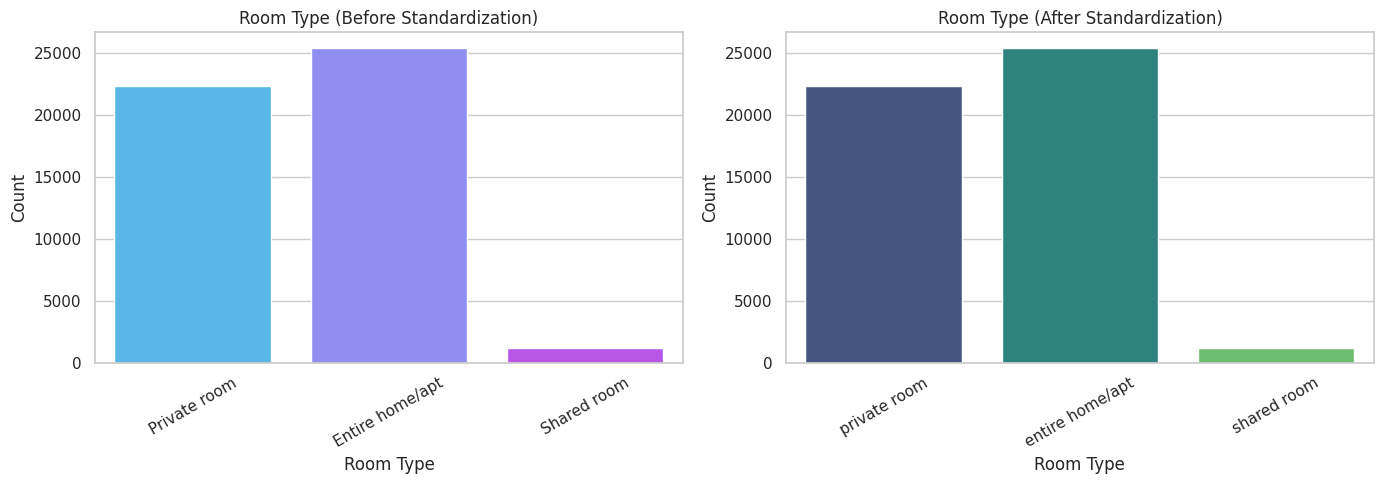

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
original_df = pd.read_csv("AB_NYC_2019.csv.zip")
standardized_df = pd.read_csv("AB_NYC_2019_Standardized.csv")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=original_df, x='room_type', hue='room_type', palette='cool', legend=False, ax=axes[0])
axes[0].set_title("Room Type (Before Standardization)")
axes[0].set_xlabel("Room Type")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=30)
sns.countplot(data=standardized_df, x='room_type', hue='room_type', palette='viridis', legend=False, ax=axes[1])
axes[1].set_title("Room Type (After Standardization)")
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv.zip")
print("Original Shape:", df.shape)
price_threshold = 1000
price_outliers = df[df['price'] > price_threshold]
print(f"\nPrice Outliers Detected: {price_outliers.shape[0]}")
min_nights_threshold = 365
nights_outliers = df[df['minimum_nights'] > min_nights_threshold]
print(f"Minimum Nights Outliers Detected: {nights_outliers.shape[0]}")
df = df[df['price'] <= price_threshold]
df = df[df['minimum_nights'] <= min_nights_threshold]
print("\nShape After Removing Outliers:", df.shape)
df.to_csv("AB_NYC_2019_No_Outliers.csv", index=False)
print("\nOutlier-handled dataset saved as 'AB_NYC_2019_No_Outliers.csv'")


Original Shape: (48895, 16)

Price Outliers Detected: 239
Minimum Nights Outliers Detected: 14

Shape After Removing Outliers: (48642, 16)

Outlier-handled dataset saved as 'AB_NYC_2019_No_Outliers.csv'


In [8]:
from google.colab import files
uploaded = files.upload()

Saving CA_category_id.json to CA_category_id.json


In [9]:
import json
import pandas as pd
from pathlib import Path
json_path = Path("CA_category_id.json")
with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)
df = pd.json_normalize(raw.get("items", []))
print("Initial Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\n1️⃣ Check data types:")
print(df.dtypes)
print("\n2️⃣ Check for missing values:")
print(df.isnull().sum())
print("\n3️⃣ Check for duplicates:")
print("Full row duplicates:", df.duplicated().sum())
print("Duplicate category IDs:", df['id'].duplicated().sum())
print("\n4️⃣ Check for invalid values:")
df['id'] = pd.to_numeric(df['id'], errors='coerce')
invalid_ids = df[df['id'].isnull()]
print(f"Invalid category IDs found: {len(invalid_ids)}")
empty_titles = df[df['snippet.title'].isnull() | (df['snippet.title'].str.strip() == "")]
print(f"Empty titles found: {len(empty_titles)}")


Initial Shape: (31, 6)

First few rows:
                    kind                                               etag  \
0  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...   
1  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...   
2  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...   
3  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...   
4  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...   

   id         snippet.channelId     snippet.title  snippet.assignable  
0   1  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation                True  
1   2  UCBR8-60-B28hp2BmDPdntcQ  Autos & Vehicles                True  
2  10  UCBR8-60-B28hp2BmDPdntcQ             Music                True  
3  15  UCBR8-60-B28hp2BmDPdntcQ    Pets & Animals                True  
4  17  UCBR8-60-B28hp2BmDPdntcQ            Sports                True  

1️⃣ Check data types:
kind                  object
e

Initial Shape: (31, 6)


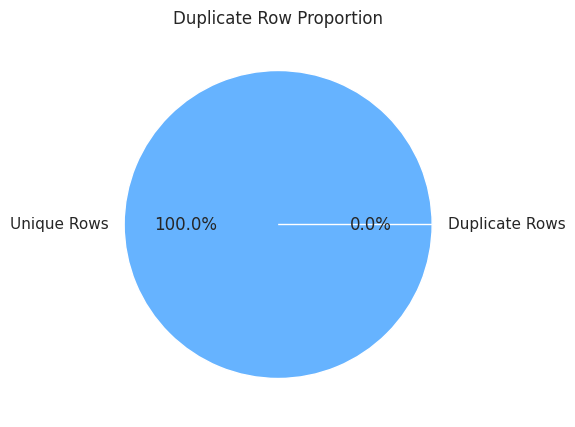

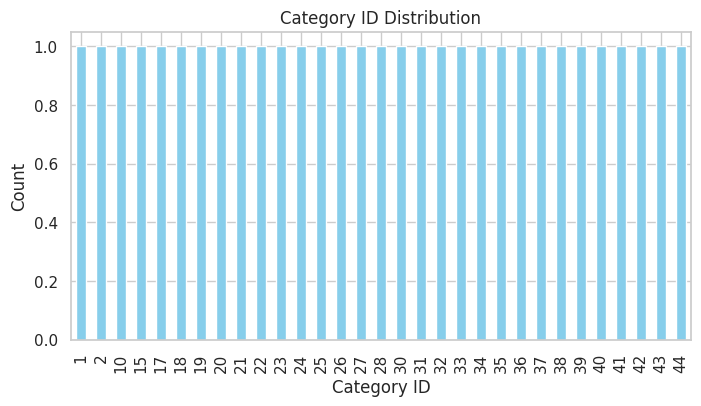

In [10]:
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
json_path = Path("CA_category_id.json")
with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)
df = pd.json_normalize(raw.get("items", []))
print("Initial Shape:", df.shape)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if not missing_counts.empty:
    plt.figure(figsize=(8, 4))
    missing_counts.plot(kind='bar', color='orange')
    plt.title("Missing Values per Column")
    plt.ylabel("Count")
    plt.show()
dup_count = df.duplicated().sum()
unique_count = len(df) - dup_count
plt.figure(figsize=(5, 5))
plt.pie([unique_count, dup_count],
        labels=['Unique Rows', 'Duplicate Rows'],
        autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'])
plt.title("Duplicate Row Proportion")
plt.show()
if 'id' in df.columns:
    try:
        df['id'] = pd.to_numeric(df['id'], errors='coerce')
        plt.figure(figsize=(8, 4))
        df['id'].value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title("Category ID Distribution")
        plt.xlabel("Category ID")
        plt.ylabel("Count")
        plt.show()
    except Exception as e:
        print("Category ID plot skipped:", e)


In [12]:
import json
import pandas as pd
from pathlib import Path
json_path = Path("CA_category_id.json")
with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)
df = pd.json_normalize(raw.get("items", []))
print("Missing values before handling:\n", df.isnull().sum(), "\n")
df = df.dropna(subset=["id"])
df["snippet.title"] = df["snippet.title"].fillna("unknown")
df["snippet.assignable"] = df["snippet.assignable"].fillna(False)
df["snippet.channelId"] = df["snippet.channelId"].fillna("unknown")
print("Missing values after handling:\n", df.isnull().sum(), "\n")
df.to_csv("CA_category_id_missing_handled.csv", index=False)
print("Cleaned dataset saved as 'CA_category_id_missing_handled.csv'")


Missing values before handling:
 kind                  0
etag                  0
id                    0
snippet.channelId     0
snippet.title         0
snippet.assignable    0
dtype: int64 

Missing values after handling:
 kind                  0
etag                  0
id                    0
snippet.channelId     0
snippet.title         0
snippet.assignable    0
dtype: int64 

Cleaned dataset saved as 'CA_category_id_missing_handled.csv'


In [13]:
import json
import pandas as pd
from pathlib import Path
json_path = Path("CA_category_id.json")
with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)
df = pd.json_normalize(raw.get("items", []))
total_duplicates = df.duplicated().sum()
id_duplicates = df["id"].duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")
print(f"Duplicate category IDs: {id_duplicates}\n")
df = df.drop_duplicates()
df = df.drop_duplicates(subset=["id"], keep="first")
print(f"Shape after removing duplicates: {df.shape}\n")
df.to_csv("CA_category_id_no_duplicates.csv", index=False)
print("Dataset without duplicates saved as 'CA_category_id_no_duplicates.csv'")


Total duplicate rows: 0
Duplicate category IDs: 0

Shape after removing duplicates: (31, 6)

Dataset without duplicates saved as 'CA_category_id_no_duplicates.csv'


In [16]:
import json
import pandas as pd
from pathlib import Path
json_path = Path("CA_category_id.json")
with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)
df = pd.json_normalize(raw.get("items", []))
df["id"] = pd.to_numeric(df["id"], errors="coerce")
invalid_ids = df[df["id"] <= 0]
print(f"Invalid category IDs: {len(invalid_ids)}")
print(invalid_ids, "\n")
empty_titles = df[df["snippet.title"].isnull() | (df["snippet.title"].str.strip() == "")]
print(f"Empty titles: {len(empty_titles)}")
def looks_like_youtube_channel_id(x):
    if pd.isna(x):
        return False
    return isinstance(x, str) and len(x) == 24 and x.startswith("UC")
df["flag_suspicious_channel"] = ~df["snippet.channelId"].apply(looks_like_youtube_channel_id)
print(f"Suspicious channel IDs: {df['flag_suspicious_channel'].sum()}")
df_clean = df[(df["id"] > 0) & (df["snippet.title"].str.strip() != "")]
df_clean = df_clean[~df_clean["flag_suspicious_channel"]]
df_clean.to_csv("CA_category_id_outliers_removed.csv", index=False)
print("Cleaned dataset saved as 'CA_category_id_outliers_removed.csv'")


Invalid category IDs: 0
Empty DataFrame
Columns: [kind, etag, id, snippet.channelId, snippet.title, snippet.assignable]
Index: [] 

Empty titles: 0
Suspicious channel IDs: 0
Cleaned dataset saved as 'CA_category_id_outliers_removed.csv'
